### Eucledian TSP

In [12]:
from math import sqrt
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
from itertools import count
import networkx as nx
import time
from collections.abc import Iterable
from matplotlib import patches
import matplotlib.gridspec as gridspec

In [13]:
with open('./initializer/test_data_1.txt', 'r') as file:
    n_points = int(file.readline()) # skip the first line
    rows = [[float(x) for x in line.split(' ')[:]] for line in file]
    cols = [list(col) for col in zip(*rows)]
    
x_cords = cols[1]
y_cords = cols[2]
points = list(zip(x_cords, y_cords))
list_points = np.array([list(a) for a in zip(x_cords, y_cords)])
name2point = {i: j for i, j in zip(count(start=1, step=1), points)}
point2name = {y: x for x,y in name2point.items()}

In [22]:
def idist(ip1, ip2):
    global points
    p1 = points[ip1]
    p2 = points[ip2]
    return (sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2))

In [23]:
def euclidian_tsp(cords):
    points = cords
    circuit = list()
    start_vertex = 0
    dark_side = set(range(n_points)) - {start_vertex}

    cycle = []
    cycle.append(start_vertex)

    current_vertex = start_vertex
    while len(dark_side) > 0:
        min_distance = None
        best_v = None
        for v in dark_side:
            if ((min_distance is None) or 
                (min_distance > idist(current_vertex, v))):
                min_distance = idist(current_vertex, v)
                best_v = v
        circuit.append((current_vertex, best_v))
        dark_side.remove(best_v)
        current_vertex = best_v
        cycle.append(current_vertex)

    circuit.append((current_vertex, start_vertex))
    circuit_length = sum(idist(*e) for e in circuit)
    OutputCircuit = [a for (a, b) in circuit]
    OutputCircuit.append(start_vertex)

    return OutputCircuit, circuit_length

In [24]:
def tourCost(route):
    totalDistance =0.0
    size = len(route)
    for index in range(size):
        if index == size-1 :
            point2 = route[0]
        else:
            point2 = route[index+1]
        totalDistance +=  idist(route[index], point2)
    return totalDistance

def swapper(route,i,k):
    r1=route[:i] 
    r2=route[i:k] 
    r2=r2[::-1] 
    r3=route[k:]
    return(r1+r2+r3)

def super_duper():
    route, dist = euclidian_tsp(points)
    for i in range(len(points)):
        for j in range(i,len(points)):
            new_route = swapper(route[:],i,j)
            new_dist=tourCost(new_route)

            if(new_dist<dist):
                dist=new_dist
                route=new_route
    route = [a+1 for a in route]
    return route, new_dist

In [25]:
# Frozen cell for code profiling, unfreez and run if you want to see the code performance.
%load_ext line_profiler
%lprun -f super_duper super_duper()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-07 s

Total time: 4.85136 s
File: <ipython-input-24-e838fb15af90>
Function: super_duper at line 19

Line #      Hits         Time  Per Hit   % Time  Line Contents
    19                                           def super_duper():
    20         1     456680.0 456680.0      0.9      route, dist = euclidian_tsp(points)
    21       151        817.0      5.4      0.0      for i in range(len(points)):
    22     11475      59834.0      5.2      0.1          for j in range(i,len(points)):
    23     11325     565720.0     50.0      1.2              new_route = swapper(route[:],i,j)
    24     11325   47347935.0   4180.8     97.6              new_dist=tourCost(new_route)
    25                                           
    26     11325      82052.0      7.2      0.2              if(new_dist<dist):
    27        22        124.0      5.6      0.0                  dist=new_dist
    28        22        204.0      9.3      0.0                  route=new_route
    29         1    

#### Really bad and slow code

In [7]:
#%%timeit -o
id_tour = super_duper()[0]
tour_cost = super_duper()[1]

In [8]:
#res = _

In [9]:
cords_tour = []
for i in id_tour:
    cords_tour.append(name2point[i])
    
edge_list = list(zip(id_tour[:-1], id_tour[1:]))

In [10]:
plot_tour = [x + y for x, y in zip(cords_tour, cords_tour[1:])]
t = [(random.uniform(1, 3),) + i for i in plot_tour]
data = np.array(t,dtype=[('MAG','float'),('X0','float'),('Y0','float'),('X1','float'),('Y1','float')])

Text(0.44, 0.98, 'Visiting all of the 150 islands')

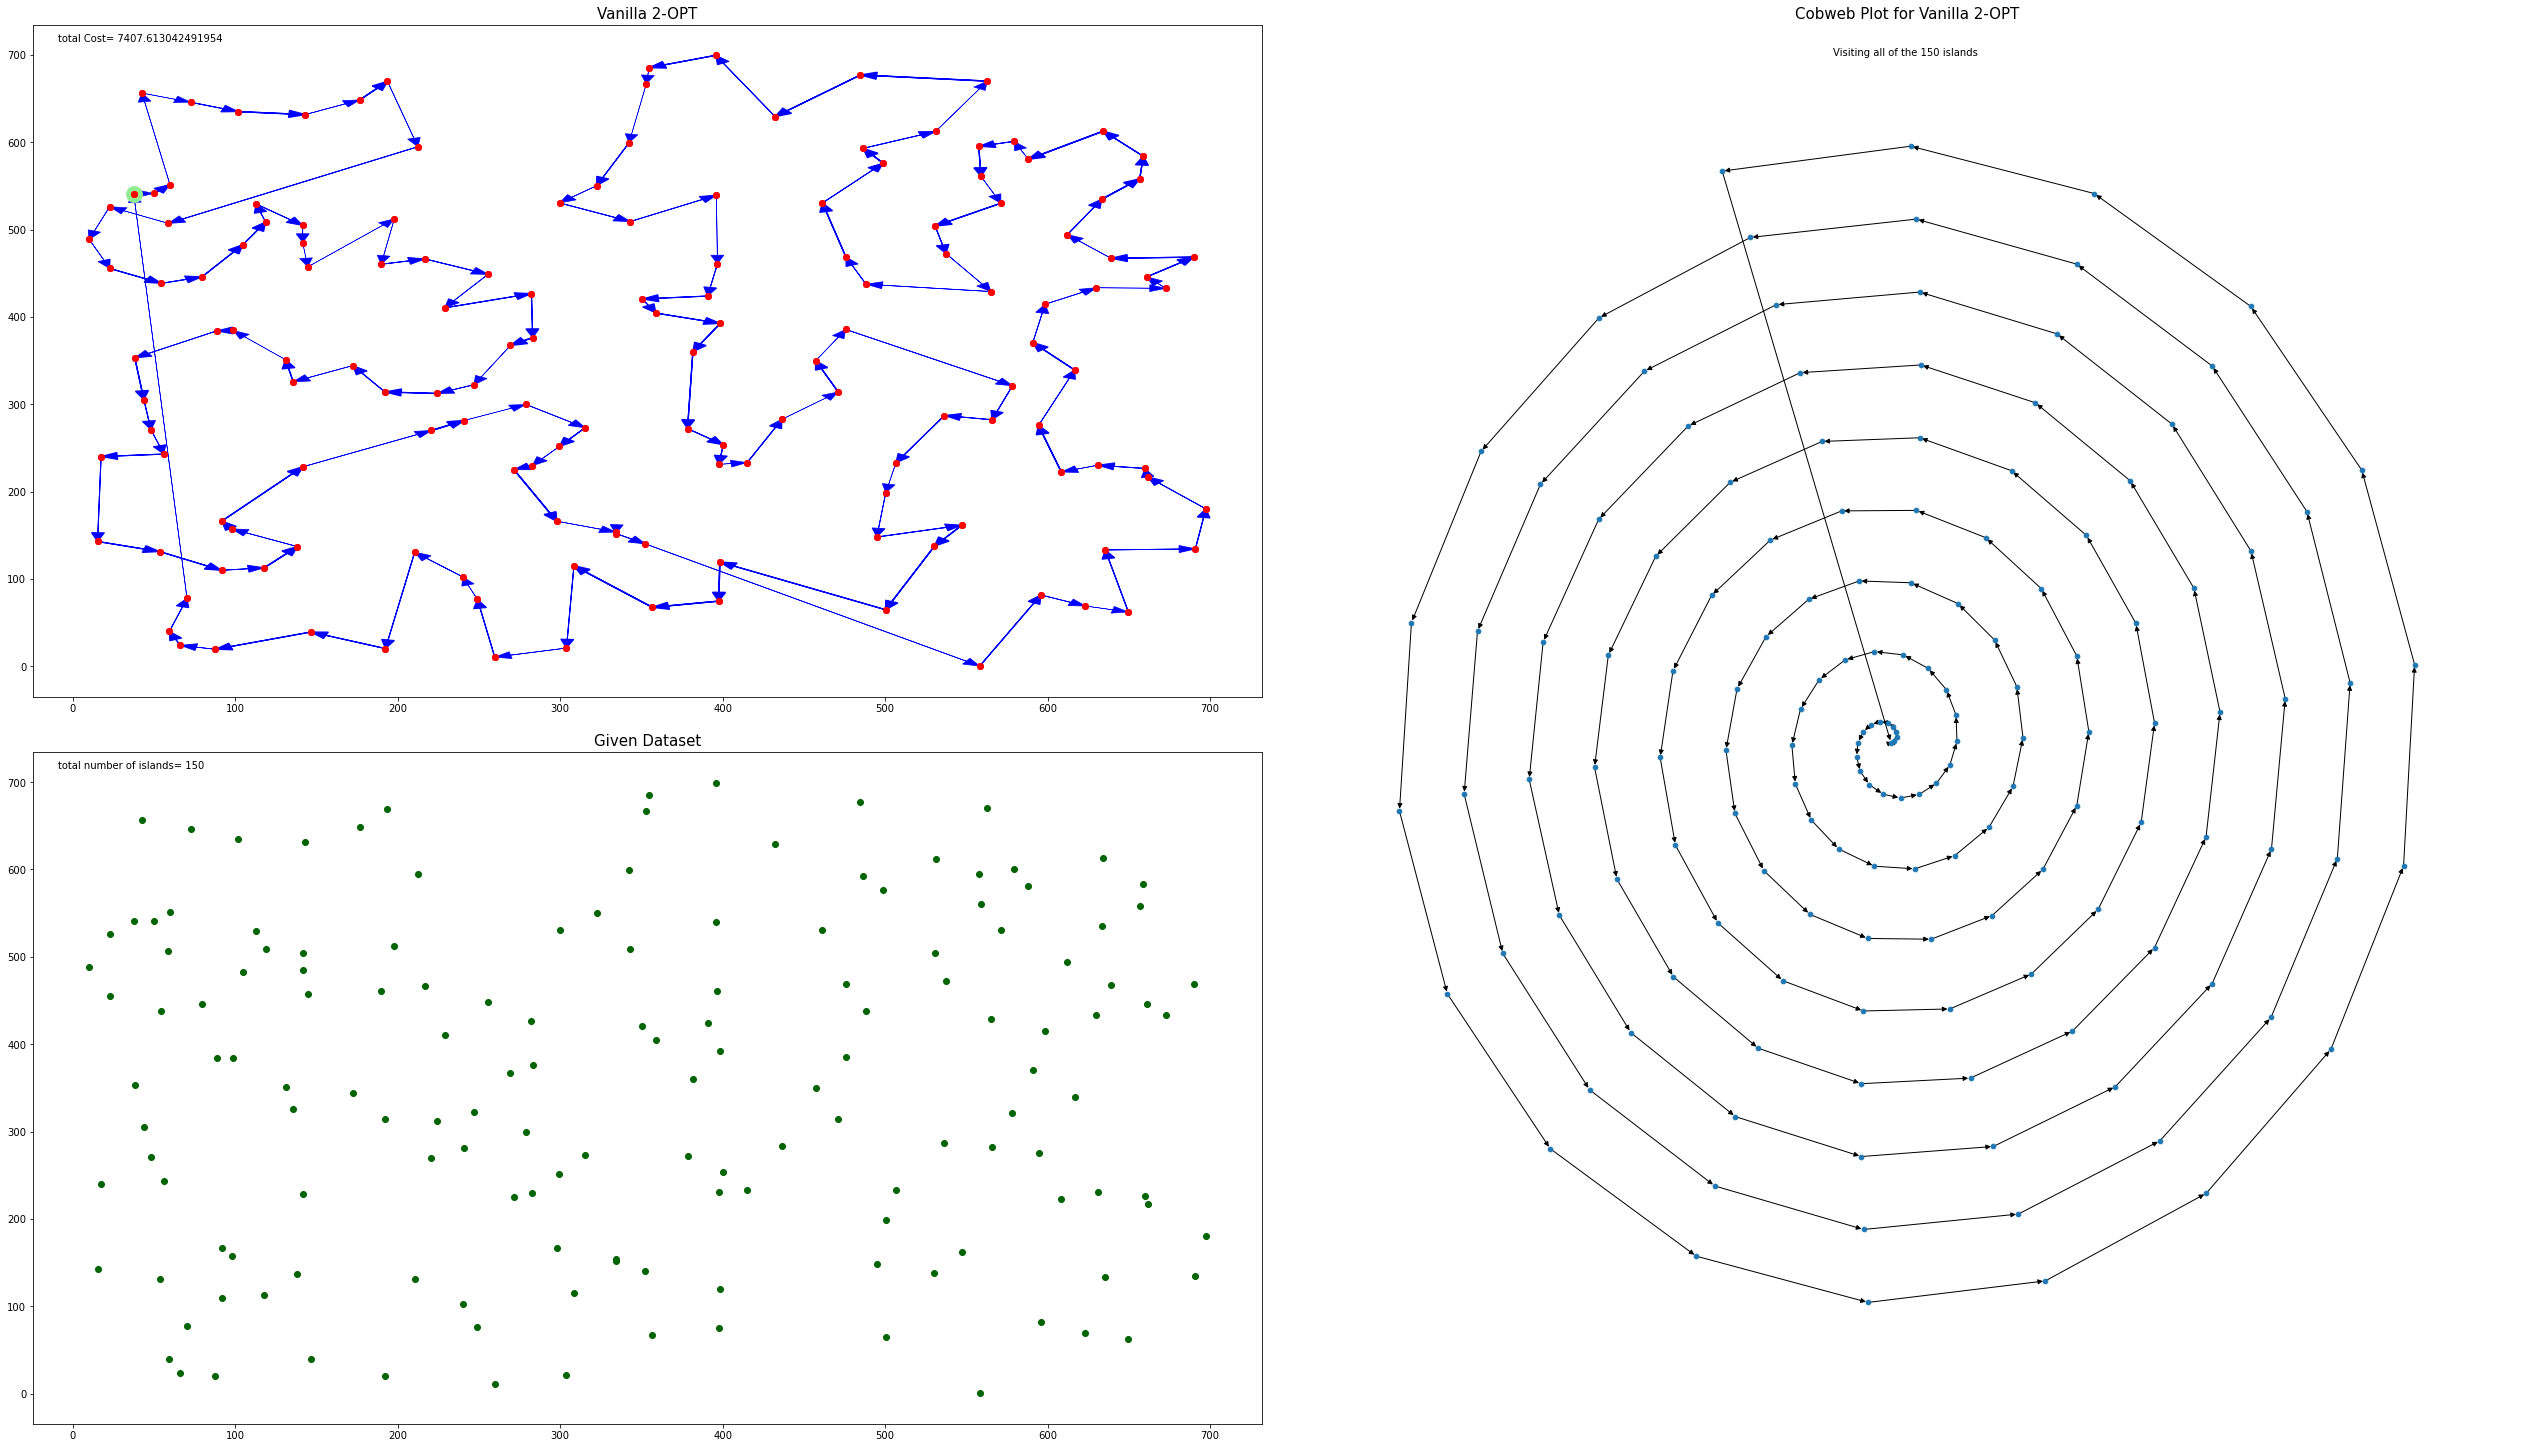

In [11]:
fig1 = plt.figure(constrained_layout=True, figsize = (35, 20))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig1)
f1_ax1 = fig1.add_subplot(spec2[0, 0])
f1_ax1.scatter(data['X0'], data['Y0'], color='r', zorder=10)
f1_ax1.scatter(data['X1'], data['Y1'], color='r', zorder=10)
homeLand = f1_ax1.scatter(cords_tour[0][0], cords_tour[0][1], color='LightGreen', s=250)

for d in data:
    if(d['MAG'] > 0):
        plt.arrow(d['X0'],d['Y0'],d['X1']-d['X0'], d['Y1']-d['Y0'], 
         shape='full', color='b', lw=d['MAG']/2., length_includes_head=True, 
         zorder=0, head_length=10., head_width=8.)
f1_ax1.set_title('Vanilla 2-OPT', fontsize=15)
f1_ax1.annotate('total Cost= {}'.format(tour_cost), (0.02, 0.98), xycoords='axes fraction', va='center')

f1_ax2 = fig1.add_subplot(spec2[1, 0])
x = [point[0] for point in points]
y = [point[1] for point in points]
rawIslands = f1_ax2.scatter(x, y, color='DarkGreen')
f1_ax2.set_title('Given Dataset', fontsize=15)
f1_ax2.annotate('total number of islands= {}'.format(n_points), (0.02, 0.98), xycoords='axes fraction', va='center')

f1_ax3 = fig1.add_subplot(spec2[:, 1])
G = nx.DiGraph()
G.add_nodes_from(id_tour)
G.add_edges_from(edge_list)
edge_colors = ['black']
pos = nx.spiral_layout(G)
nx.draw(G, pos, node_size=22, ax=f1_ax3, edge_color=edge_colors, edge_cmap=plt.cm.Reds, with_labels = False)
f1_ax3.set_title('Cobweb Plot for Vanilla 2-OPT', fontsize=15)
f1_ax3.annotate('Visiting all of the {} islands'.format(len(id_tour)-1), (0.44, 0.98), xycoords='axes fraction', va='center')